# Regression Evaluation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Why do we evaluate models?

- Does this model add any value?
- Which model is better?
- How confident am I in my model's predictions?

## TL:DR

- RMSE: 
    - how much error does the typical prediction has
    - same units as the target
    - smaller is better
- R2: 
    - variance in y (target) explained by X (predictor)
    - closer to 1 is better
    
slides: https://docs.google.com/presentation/d/1aSl4283cdR5WzyGA8xLYkXqflG1Zyoza-3ZnEUgFVNQ/edit?usp=sharing

### Can we predict the final grade of students based on score from 1st quiz
x = score from exam1

y = final grade

In [2]:
# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], 
                            [80, 85], [76, 80], [70, 68], [79, 75]]), 
                  columns = ['x', 'y'])

x = df['x']
y = df['y']

In [3]:
#look at it
df

,x,y
0,100,96
1,93,90
2,84,89
3,80,85
4,76,80
5,70,68
6,79,75


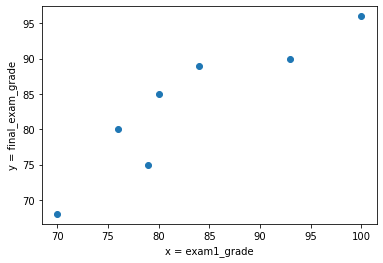

In [4]:
# look at scatter of x vs y
plt.scatter(df.x, df.y)

plt.xlabel('x = exam1_grade')
plt.ylabel('y = final_exam_grade')
plt.show()

Linear Regression:

 - Does a set of independent variables do a good job in predicting an outcome (dependent) variable?  
 - Is the model good enough compared to a baseline?  
 - Is the model with features/ind variable valuable/significant compared to a model with no features? 

### Create a baseline prediction
- Make a prediction just based on dependent variable i.e. model with no independent variable
    - mean or median of dependent variable (we will use mean for this lesson)


In [5]:
#calculate mean
baseline = df.y.mean()
baseline

83.28571428571429

In [6]:
#add it to the df
df['baseline'] = baseline

In [7]:
df

,x,y,baseline
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714
3,80,85,83.285714
4,76,80,83.285714
5,70,68,83.285714
6,79,75,83.285714


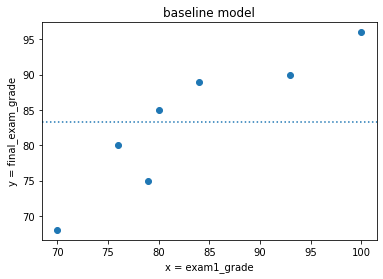

In [8]:
# plot data with baseline:
plt.scatter(df.x, df.y)
plt.axhline(baseline, ls=':')

plt.xlabel('x = exam1_grade')
plt.ylabel('y = final_exam_grade')
plt.title('baseline model')
plt.show()

### Now we fit a regression model using OLS method
1. make it
2. fit it
3. do it

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# OLS = ordinary least squares
# create the model object
lm = LinearRegression()

# fit the model to trainig data
lm.fit(df[['x']], df.y)

# make prediction
# lm.predict will output a numpy array of values,
# we will put those values into a series in df
df['yhat'] = lm.predict(df[['x']])

In [11]:
df

,x,y,baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418
5,70,68,83.285714,72.097968
6,79,75,83.285714,79.759142


Variables
- x: exam1 score
- y: final exam score actual
- baseline: final exam baseline prediction
- yhat: final exam score OLS prediction

### Let's plot it! 

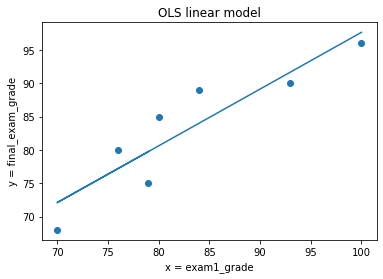

In [12]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(df.x, df.y)

#lineplot is my regression line
plt.plot(df.x, df.yhat)

plt.xlabel('x = exam1_grade')
plt.ylabel('y = final_exam_grade')
plt.title('OLS linear model')
plt.show()

## Regression Metrics: Measure of dispersion/distance of datapoints around the fitted line
### Regression Metrics
- Compare to baseline
- Compare different models with different independent variables

### Vocabulary
- Residual: error (change in actual and predicted)
- SSE: sum of squared error
- MSE: mean squared error
- RMSE: root mean squared error

In [13]:
df

,x,y,baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418
5,70,68,83.285714,72.097968
6,79,75,83.285714,79.759142


### Calculate the residuals for both yhat and baseline

In [14]:
# residual = actual - predicted
df['baseline_residual'] = df.y - df.baseline
df['residual'] = df.y - df.yhat

In [15]:
df

,x,y,baseline,yhat,baseline_residual,residual
0,100,96,83.285714,97.635214,12.714286,-1.635214
1,93,90,83.285714,91.676524,6.714286,-1.676524
2,84,89,83.285714,84.015350,5.714286,4.984650
3,80,85,83.285714,80.610384,1.714286,4.389616
4,76,80,83.285714,77.205418,-3.285714,2.794582
5,70,68,83.285714,72.097968,-15.285714,-4.097968
6,79,75,83.285714,79.759142,-8.285714,-4.759142


### Residuals for Baseline model

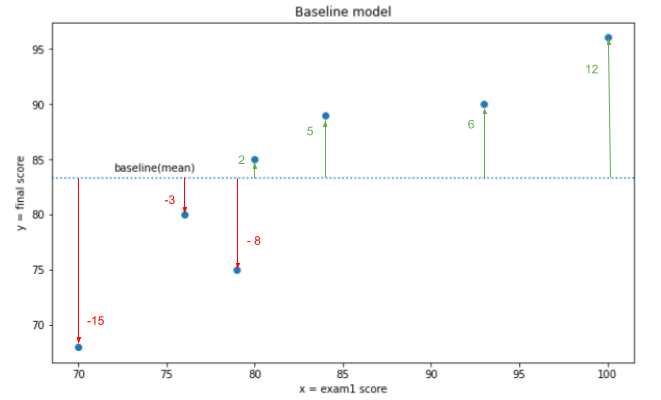

### Residuals for OLS model

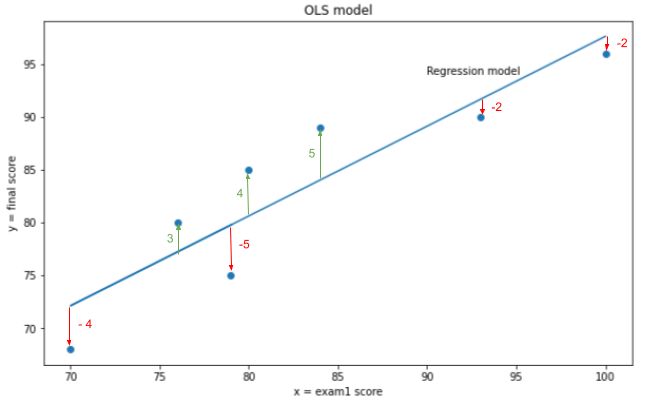

> Do we prefer higher residuals or lower residuals?

### What is the sum of residuals for these models?

In [16]:
#baseline residual sum
df.baseline_residual.sum()

-4.263256414560601e-14

In [17]:
#osl residual sum
df.residual.sum()

-1.4210854715202004e-14

> Both sums are pretty much zero, so summing residuals is not a helpful measure to finding line of best fit

### SSE (Sum of Squared Errors)

- the sum of all the squared errors

In [18]:
df

,x,y,baseline,yhat,baseline_residual,residual
0,100,96,83.285714,97.635214,12.714286,-1.635214
1,93,90,83.285714,91.676524,6.714286,-1.676524
2,84,89,83.285714,84.015350,5.714286,4.984650
3,80,85,83.285714,80.610384,1.714286,4.389616
4,76,80,83.285714,77.205418,-3.285714,2.794582
5,70,68,83.285714,72.097968,-15.285714,-4.097968
6,79,75,83.285714,79.759142,-8.285714,-4.759142


#### 1. calculate the square of the residual

In [19]:
# the difference between yhat and y, just squared
df['baseline_residual_2'] = df.baseline_residual**2
df['residual_2'] = df.residual**2

In [20]:
df

,x,y,baseline,yhat,baseline_residual,residual,baseline_residual_2,residual_2
0,100,96,83.285714,97.635214,12.714286,-1.635214,161.653061,2.673926
1,93,90,83.285714,91.676524,6.714286,-1.676524,45.081633,2.810732
2,84,89,83.285714,84.015350,5.714286,4.984650,32.653061,24.846737
3,80,85,83.285714,80.610384,1.714286,4.389616,2.938776,19.268731
4,76,80,83.285714,77.205418,-3.285714,2.794582,10.795918,7.809691
5,70,68,83.285714,72.097968,-15.285714,-4.097968,233.653061,16.793345
6,79,75,83.285714,79.759142,-8.285714,-4.759142,68.653061,22.649435


#### 2. sum up the residual square

In [21]:
#add the residuals together
SSE_baseline = df.baseline_residual_2.sum()
SSE = df.residual_2.sum()

#### 3. compare!

In [22]:
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE Baseline = 555.4
SSE = 96.9


**Note:** In regression, the 'line of best fit' is one which minimizes the SSE

### MSE (Mean Squared Error)

- the average of your errors that have each been squared
- MSE = SSE/(no. of data points)



In [23]:
#calcaluate MSE
MSE_baseline = SSE_baseline/len(df)
MSE = SSE/len(df)

In [24]:
print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 79.3
MSE = 13.8


### RMSE (Root Mean Squared Error)
- Square root of MSE
- Same units as the output (y) variable

In [25]:
#calculate RMSE
RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

In [26]:
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE baseline =  8.9
RMSE =  3.7


## Another Way! - sklearn

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
    
Start with MSE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html 

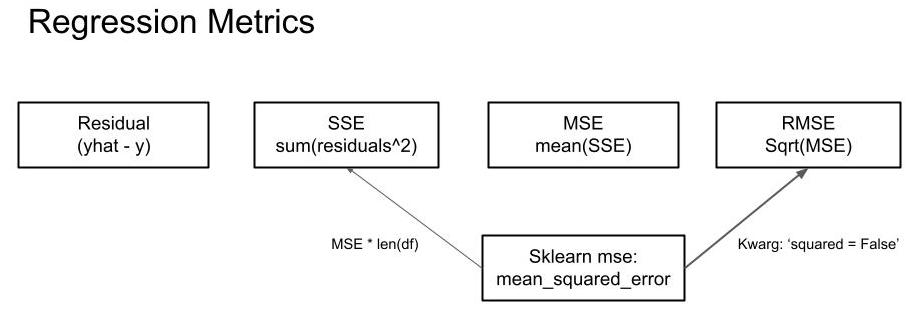

In [27]:
#import sklearn mean_square_error
from sklearn.metrics import mean_squared_error

### MSE (Mean Squared Error)


In [28]:
MSE2_baseline = mean_squared_error(df.y, df.baseline)
MSE2 = mean_squared_error(df.y, df.yhat)

In [29]:
print("MSE baseline:", MSE2_baseline) 
print("MSE:", MSE2) 

MSE baseline: 79.34693877551021
MSE: 13.836085133827794


### SSE (Sum of Squared Errors)

In [30]:
SSE2_baseline =  MSE2_baseline * len(df)
SSE2 = MSE2 * len(df)

In [31]:
print("SSE baseline:" ,SSE2_baseline) 
print("SSE:", SSE2) 

SSE baseline: 555.4285714285714
SSE: 96.85259593679456


### RMSE (Root Mean Squared Error)

In [32]:
RMSE2_baseline = MSE2_baseline**.5
RMSE2 = MSE2**.5

In [33]:
print("RMSE baseline" ,RMSE2_baseline)
print("RMSE", RMSE2) 

RMSE baseline 8.907689867497083
RMSE 3.719688849060872


#### You can also use sklearn.mean_squared_error('squared = False')

In [34]:
mean_squared_error(df.y, df.baseline, squared=False)

8.907689867497083

In [35]:
mean_squared_error(df.y, df.yhat, squared=False)

3.719688849060872

## Which metric to use?
Most often used:

- RMSE - Most commonly used - Same units as the dependent variable. Average distance of each point from fitted regression line

- SSE - If outliers matter, you can use SSE - Amplifies the effect of outliers
    - Residual 5 ----> SSE 25
    - Residual 10 ---> SSE 100

## How much of variance in target variable is explained by your independent variables?

 - $R^2$ - Coefficient of determination (0 to 1)
     - r2_score == explained_variance_score
 - Compares the fit of the chosen model with that of a horizontal straight line (baseline)


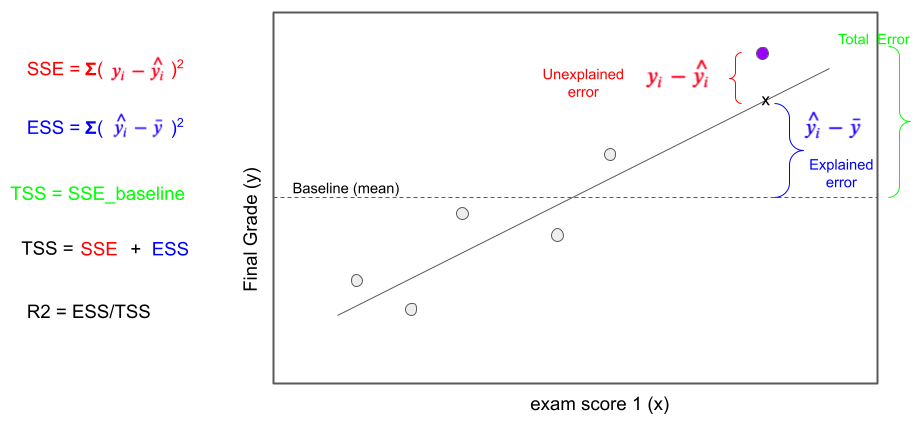

Distance between the point (value) and mean value (baseline) is 'Total Error'  
Total Error = 'Explained Error' (accounted by for regression) + 'Unexplained Error'  

ESS = Explained Sum of Squared Error  
TSS = Total sum of squared error

$R^2$ = ESS/TSS

$R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS)

*Note: TSS == SSE for baseline model (mean model)*

### Calculate R2 manually

In [36]:
# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline
TSS

555.4285714285714

In [37]:
# Sum of squared error for the regression line (Unexplained error)
SSE

96.85259593679456

In [38]:
# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE
ESS

458.5759754917769

In [39]:
# Calculate R2
R2 = ESS/TSS
R2

0.8256254702784048

### Calculate R2 with sklearn

In [40]:
#import r2_score from sklearn
from sklearn.metrics import r2_score

In [41]:
df

,x,y,baseline,yhat,baseline_residual,residual,baseline_residual_2,residual_2
0,100,96,83.285714,97.635214,12.714286,-1.635214,161.653061,2.673926
1,93,90,83.285714,91.676524,6.714286,-1.676524,45.081633,2.810732
2,84,89,83.285714,84.015350,5.714286,4.984650,32.653061,24.846737
3,80,85,83.285714,80.610384,1.714286,4.389616,2.938776,19.268731
4,76,80,83.285714,77.205418,-3.285714,2.794582,10.795918,7.809691
5,70,68,83.285714,72.097968,-15.285714,-4.097968,233.653061,16.793345
6,79,75,83.285714,79.759142,-8.285714,-4.759142,68.653061,22.649435


In [42]:
#use r2_score
r2_score(df.y, df.yhat)

0.8256254702784048